I'll attempt to apply the model learned [here](https://towardsdatascience.com/predicting-invasive-ductal-carcinoma-using-convolutional-neural-network-cnn-in-keras-debb429de9a6) to a different dataset in a different notebook. The [dataset](http://www.andrewjanowczyk.com/use-case-6-invasive-ductal-carcinoma-idc-segmentation/) used in the guide has 162 mount slide images of Breast Cancer, with 277,524 patches of size 50x50. Before I do that, I must learn how to generate a patch from an image using Python. 

### Reshaping an image into a collection of patches with scikit
***

First, following [scikit extract_patches_2d documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.image.extract_patches_2d.html) and the [user guide](https://scikit-learn.org/stable/modules/feature_extraction.html#image-feature-extraction).

In [1]:
# Has 2 samples images (china and flower)
from sklearn.datasets import load_sample_image 
from sklearn.feature_extraction import image

In [5]:
flower = load_sample_image("flower.jpg")
china = load_sample_image("china.jpg")

In [7]:
print(f'Flower picture shape: {flower.shape}')
print(f'China picture shape: {china.shape}')

Flower picture shape: (427, 640, 3)
China picture shape: (427, 640, 3)


In [8]:
#image.extract_patches_2d(image ndarray, patch_size(hxw))
flower_patches = image.extract_patches_2d(flower, (2,2))
china_patches = image.extract_patches_2d(china, (2,2))

In [9]:
flower_patches.shape

(272214, 2, 2, 3)

In [11]:
flower_reconstructed = image.reconstruct_from_patches_2d(flower_patches, (427, 640, 3))
china_reconstructed = image.reconstruct_from_patches_2d(china_patches, (427, 640, 3))

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
np.testing.assert_array_equal(flower, flower_reconstructed)

In [19]:
np.testing.assert_array_equal(china, china_reconstructed)

In [20]:
# Comparing different images to see how function works
np.testing.assert_array_equal(china, flower_reconstructed)

AssertionError: 
Arrays are not equal

Mismatched elements: 817017 / 819840 (99.7%)
Max absolute difference: 255.
Max relative difference: 254.
 x: array([[[174, 201, 231],
        [174, 201, 231],
        [174, 201, 231],...
 y: array([[[ 2., 19., 13.],
        [ 3., 18., 13.],
        [ 7., 20., 13.],...

Text(0.5, 1.0, 'Flower image reconstructed')

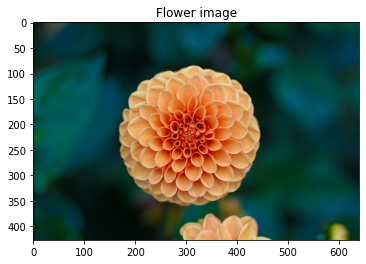

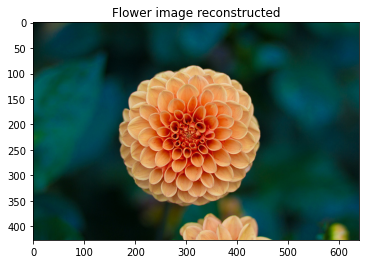

In [45]:
plt.figure()
plt.imshow(flower)
plt.title("Flower image")
plt.figure()
plt.imshow(flower_reconstructed.astype(np.uint8))
plt.title("Flower image reconstructed")

Text(0.5, 1.0, 'China image reconstructed')

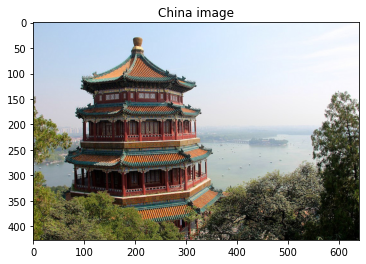

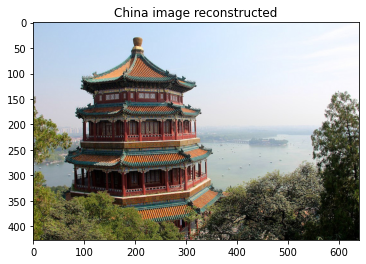

In [46]:
plt.figure()
plt.imshow(china)
plt.title("China image")
plt.figure()
plt.imshow(china_reconstructed.astype(np.uint8))
plt.title("China image reconstructed")

In [53]:
china[0]

array([[174, 201, 231],
       [174, 201, 231],
       [174, 201, 231],
       ...,
       [250, 251, 255],
       [250, 251, 255],
       [250, 251, 255]], dtype=uint8)

In [18]:
del flower, flower_patches, flower_reconstructed
del china, china_patches, china_reconstructed

In [3]:
import cv2

In [4]:
# Trying to duplicate guide but with a different picture 
test_image = cv2.imread("SOB_B_A-14-22549AB-400-001.png")

In [5]:
test_image.shape

(460, 700, 3)

Text(0.5, 1.0, 'Test image before patches')

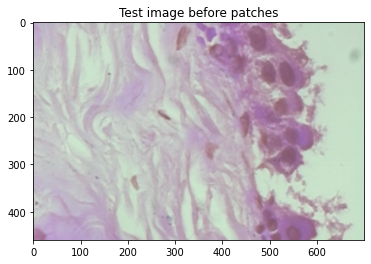

In [6]:
plt.figure()
plt.imshow(test_image)
plt.title("Test image before patches")

In [52]:
test_image[0]

array([[182, 169, 193],
       [184, 171, 197],
       [184, 168, 199],
       ...,
       [193, 215, 197],
       [193, 212, 195],
       [197, 212, 198]], dtype=uint8)

In [11]:
patches_test = image.extract_patches_2d(test_image, (100,100), max_patches=5)

In [12]:
patches_test.shape

(5, 100, 100, 3)

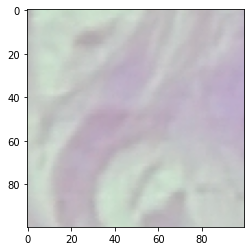

In [15]:
plt.figure()
plt.imshow(patches_test[3])

In [16]:
del patches_test

In [22]:
patches= image.extract_patches_2d(test_image, (40,40))

In [24]:
patches.shape

(278281, 40, 40, 3)

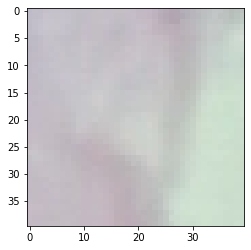

In [31]:
plt.figure()
plt.imshow(patches[45])

In [32]:
reconstructed = image.reconstruct_from_patches_2d(patches,(460, 700, 3))

In [33]:
reconstructed.shape

(460, 700, 3)

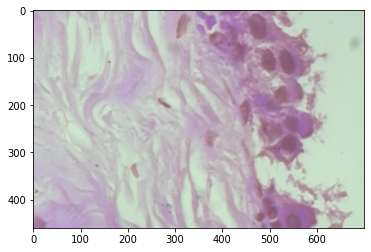

In [34]:
plt.figure()
plt.imshow(reconstructed.astype(np.uint8))

In [35]:
np.testing.assert_array_equal(test_image, reconstructed)

In [37]:
del test_image, patches, reconstructed

Following [scikit PatchExtractor documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.image.PatchExtractor.html#sklearn.feature_extraction.image.PatchExtractor) in order to learn how do extract patches from a collection of images.

In [39]:
from glob import glob
import fnmatch

In [66]:
def image_loader(paths):
    collection = []
    for img in paths:
        image = cv2.imread(img)
        collection.append(image)
    
    return np.array(collection)

In [67]:
image_paths = glob('/home/bea/ic-redes-neurais/neural-network-studies/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-14134/100X/*.png')

In [68]:
image_paths

['/home/bea/ic-redes-neurais/neural-network-studies/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-14134/100X/SOB_B_F-14-14134-100-011.png',
 '/home/bea/ic-redes-neurais/neural-network-studies/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-14134/100X/SOB_B_F-14-14134-100-026.png',
 '/home/bea/ic-redes-neurais/neural-network-studies/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-14134/100X/SOB_B_F-14-14134-100-016.png',
 '/home/bea/ic-redes-neurais/neural-network-studies/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-14134/100X/SOB_B_F-14-14134-100-022.png',
 '/home/bea/ic-redes-neurais/neural-network-studies/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-14134/100X/SOB_B_F-14-14134-100-005.png',
 '/home/bea/ic-redes-neurais/neural-network-studies/BreaKHis_v1/histology_slides/breast/benign/SOB/fibroadenoma/SOB_B_F_14-14134/100X/SOB_B_F-14-14134-100-001.png',
 '/home/be

In [69]:
images = image_loader(image_paths)

In [70]:
type(images)

numpy.ndarray

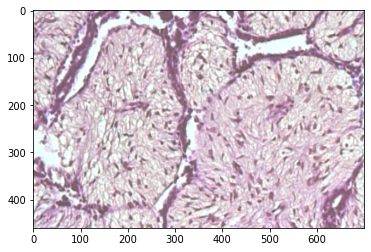

In [71]:
plt.figure()
plt.imshow(images[0])

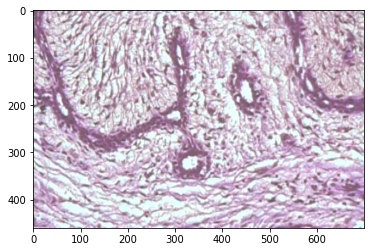

In [81]:
plt.imshow(images[1])

In [72]:
pe = image.PatchExtractor(patch_size=(40,40), max_patches=1000)
pe_fit = pe.fit(images)
pe_trans = pe.transform(images)

In [73]:
pe_trans.shape

(31000, 40, 40, 3)

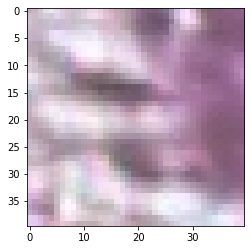

In [80]:
plt.figure()
plt.imshow(pe_trans[30999].astype(np.uint8))